# Deep Neural network Traning on CIFAR10

In [1]:
# Steps:
# 0. Import Libs
# 1. Preprocessing
# 2. Model
# 3. Compile
# 4. Fit
# 5. Evaluate
# 6. Predict

## Import Libraries

In [2]:
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.utils import plot_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

## Preprocessing and Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Display 10 categories of dataset

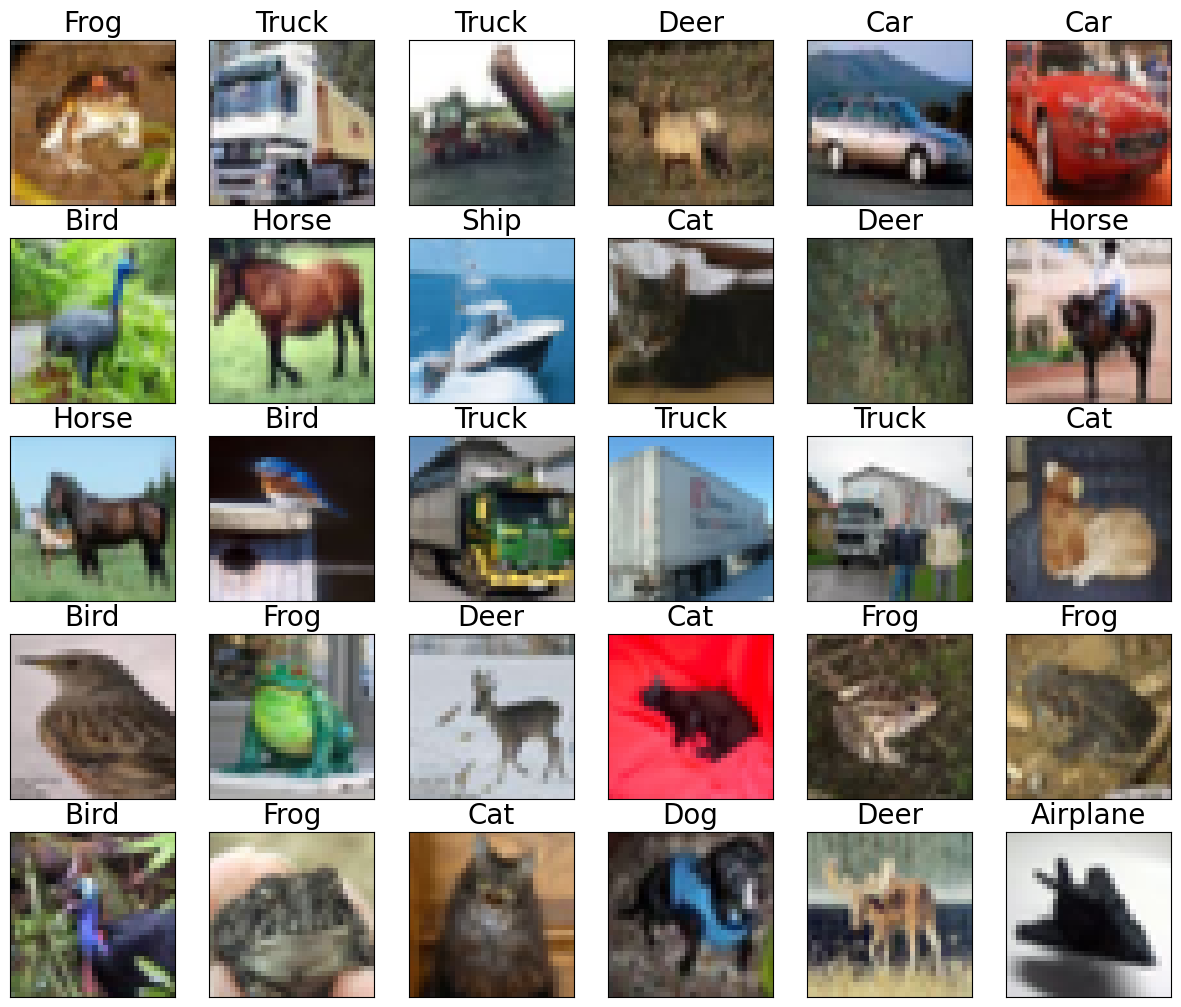

In [4]:
class_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(15,15))



for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i][0]], fontsize=20)
plt.show()

In [5]:
# Normalisation & One-hot encoding
X_train, X_test = X_train/255.0 , X_test/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Create a DNN model

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M2


## Compile and Train the model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1)

Epoch 1/10


2023-08-14 22:29:14.093592: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


400/400 [==============================] - 4s 9ms/step - loss: 2.0263 - accuracy: 0.2548 - val_loss: 1.8644 - val_accuracy: 0.3303
Epoch 2/10
400/400 [==============================] - 3s 8ms/step - loss: 1.8684 - accuracy: 0.3193 - val_loss: 1.8179 - val_accuracy: 0.3447
Epoch 3/10
400/400 [==============================] - 4s 10ms/step - loss: 1.8227 - accuracy: 0.3375 - val_loss: 1.7426 - val_accuracy: 0.3805
Epoch 4/10
400/400 [==============================] - 3s 8ms/step - loss: 1.7978 - accuracy: 0.3479 - val_loss: 1.7182 - val_accuracy: 0.3920
Epoch 5/10
400/400 [==============================] - 3s 8ms/step - loss: 1.7619 - accuracy: 0.3615 - val_loss: 1.7100 - val_accuracy: 0.3971
Epoch 6/10
400/400 [==============================] - 3s 9ms/step - loss: 1.7477 - accuracy: 0.3692 - val_loss: 1.6935 - val_accuracy: 0.4024
Epoch 7/10
400/400 [==============================] - 3s 8ms/step - loss: 1.7272 - accuracy: 0.3767 - val_loss: 1.7082 - val_accuracy: 0.4053
Epoch 8/10
400/4

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 250)               768250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32128     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 801,668
Trainable params: 801,668
Non-trai

##  Architecture diagram of the model

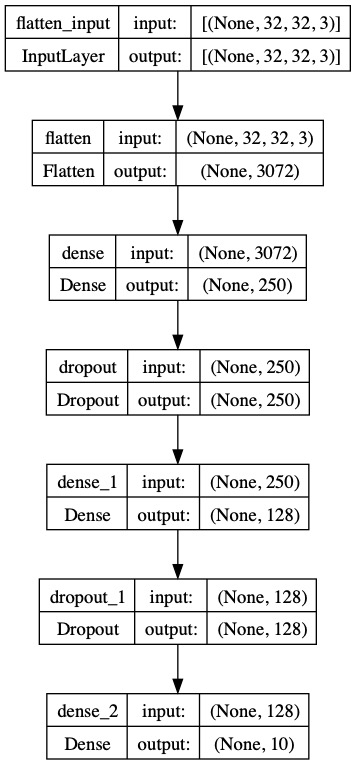

<Figure size 1000x2300 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 23))
plot_model(model, 'model.jpg', show_shapes=True)

## Evaluate the model

In [10]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 1.6370 - accuracy: 0.4202


[1.6369857788085938, 0.420199990272522]

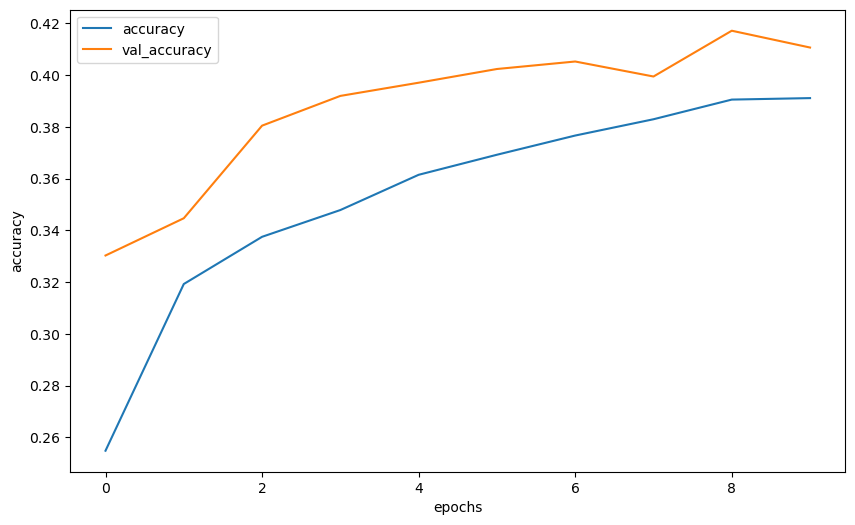

In [11]:

plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

## Predict the new image

In [12]:
# Load the image
image = cv2.imread('benz.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

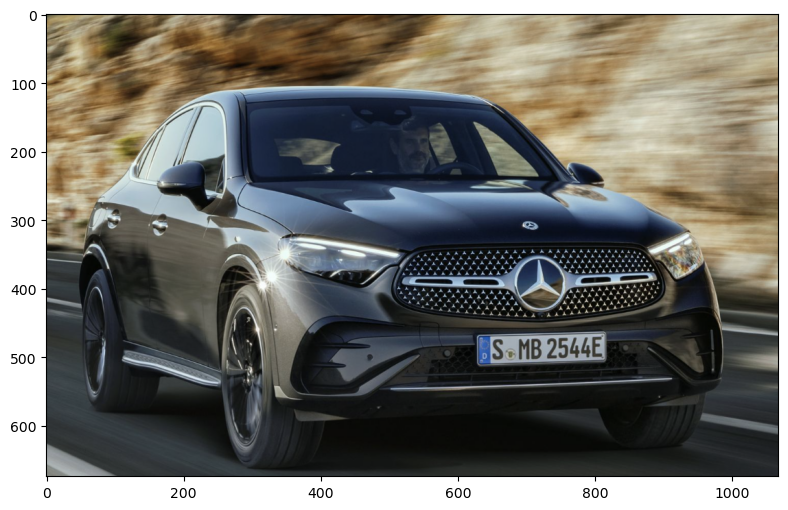

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.show()

In [14]:
# preprocessing

image = cv2.resize(image, (32,32))

image = image / 255.0

image = image.reshape((1, 32, 32, 3))

In [15]:
prediction = model.predict(image)

1/1 [==============================] - 0s 354ms/step
